<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/WT_for_VIV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth
from google.colab import auth
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install PyWavelets
import pywt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


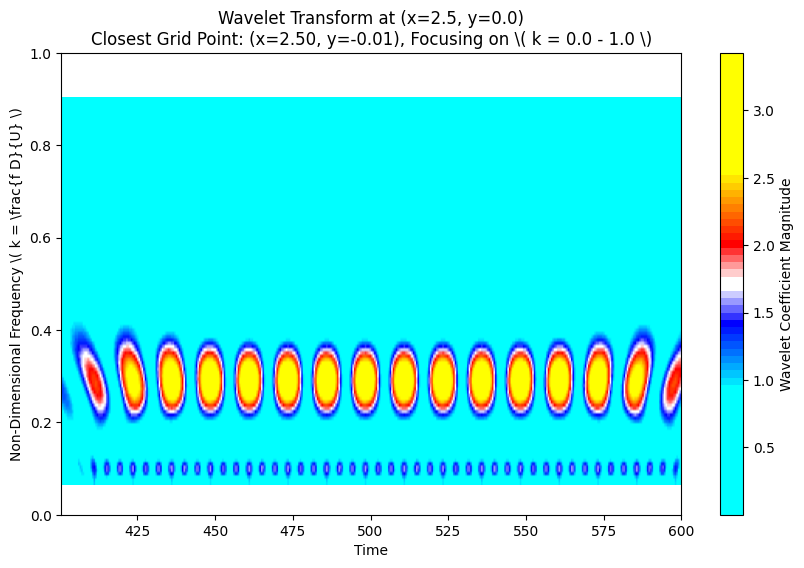

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Load CCcool colormap
cccool_data = loadmat('/content/drive/MyDrive/Re500_RV5_D0p9/CCcool.mat')
CC = cccool_data['CC']
custom_cmap = ListedColormap(CC)

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.0  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Filter for k range 0 - 1.0
valid_indices = np.where((k_values >= 0.0) & (k_values <= 1.0))
filtered_coefficients = coefficients[valid_indices, :][0]
filtered_k_values = k_values[valid_indices]

# Plot wavelet scalogram in terms of non-dimensional frequency k
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(filtered_coefficients), aspect='auto',
           extent=[Time.min(), Time.max(), filtered_k_values.min(), filtered_k_values.max()],
           cmap=custom_cmap, origin='lower')
plt.colorbar(label="Wavelet Coefficient Magnitude")
plt.xlabel("Time")
plt.ylabel("Non-Dimensional Frequency \( k = \\frac{f D}{U} \)")
plt.yscale('linear')  # Keep linear scale for better readability in small range
plt.ylim(0.0, 1.0)  # Focus only on the region k = 0.0 - 1.0
plt.title(f"Wavelet Transform at (x={x_target}, y={y_target})\n"
          f"Closest Grid Point: (x={pxnew[nearest_index]:.2f}, y={pynew[nearest_index]:.2f}), "
          f"Focusing on \( k = 0.0 - 1.0 \)")
plt.show()



🔹 Dominant Frequencies Over Time:
Time: 400.50, Dominant k: 0.214
Time: 401.00, Dominant k: 0.220
Time: 401.50, Dominant k: 0.226
Time: 402.00, Dominant k: 0.232
Time: 402.50, Dominant k: 0.239
Time: 403.00, Dominant k: 0.239
Time: 403.50, Dominant k: 0.246
Time: 404.00, Dominant k: 0.254
Time: 404.50, Dominant k: 0.156
Time: 405.00, Dominant k: 0.163
Time: 405.50, Dominant k: 0.163
Time: 406.00, Dominant k: 0.166
Time: 406.50, Dominant k: 0.169
Time: 407.00, Dominant k: 0.169
Time: 407.50, Dominant k: 0.177
Time: 408.00, Dominant k: 0.177
Time: 408.50, Dominant k: 0.181
Time: 409.00, Dominant k: 0.185
Time: 409.50, Dominant k: 0.185
Time: 410.00, Dominant k: 0.193
Time: 410.50, Dominant k: 0.198
Time: 411.00, Dominant k: 0.198
Time: 411.50, Dominant k: 0.203
Time: 412.00, Dominant k: 0.208
Time: 412.50, Dominant k: 0.208
Time: 413.00, Dominant k: 0.220
Time: 413.50, Dominant k: 0.220
Time: 414.00, Dominant k: 0.226
Time: 414.50, Dominant k: 0.232
Time: 415.00, Dominant k: 0.232
Time:

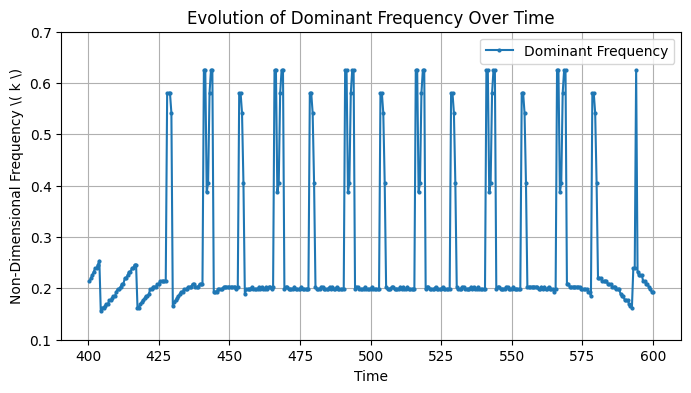

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.5  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Find the dominant frequency at each time step
dominant_indices = np.argmax(np.abs(coefficients), axis=0)  # Index of max coefficient at each time step
dominant_frequencies = k_values[dominant_indices]  # Extract corresponding frequency

# Print dominant frequencies
print("\n🔹 Dominant Frequencies Over Time:")
for t, k in zip(Time, dominant_frequencies):
    print(f"Time: {t:.2f}, Dominant k: {k:.3f}")

# Plot the dominant frequency evolution
plt.figure(figsize=(8, 4))
plt.plot(Time, dominant_frequencies, 'o-', markersize=2, label="Dominant Frequency")
plt.xlabel("Time")
plt.ylabel("Non-Dimensional Frequency \( k \)")
plt.title("Evolution of Dominant Frequency Over Time")
plt.legend()
plt.grid()
plt.ylim(0.1, 0.7)  # Focus on the k range of interest
plt.show()


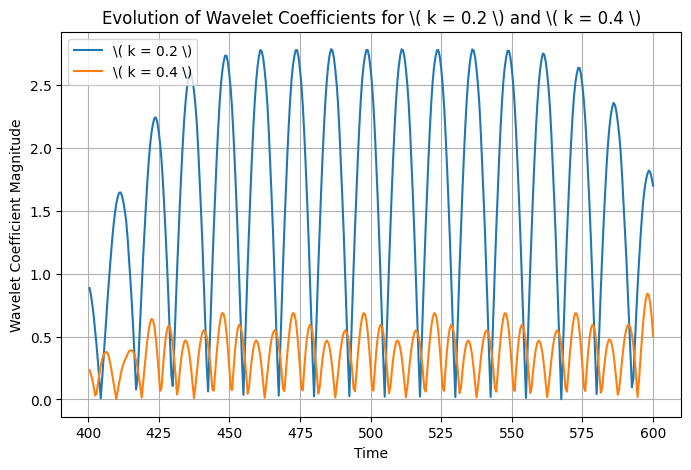

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap

# Load Ground_data.mat
file_path = '/content/drive/MyDrive/Re500_RV5_D0p25/VortZ_interp.mat'
data = loadmat(file_path)

Xnew = data['Xnew']  # Vorticity data (grid_points x time_steps)
nxi = int(data['nxi'].item())  # Extract as scalar
nyi = int(data['nyi'].item())  # Extract as scalar
pxnew = data['pxnew'].flatten()  # x-coordinates
pynew = data['pynew'].flatten()  # y-coordinates
Time = data['Time'].flatten()  # Time array
dt = np.mean(np.diff(Time))  # Time step size

# Flow parameters
U = 0.2  # Velocity
D = 1.0  # Characteristic length

# Choose spatial point by coordinates
x_target = 2.5  # Desired x-coordinate
y_target = 0.5  # Desired y-coordinate

# Find the nearest grid point index
distances = np.sqrt((pxnew - x_target)**2 + (pynew - y_target)**2)
nearest_index = np.argmin(distances)  # Index of closest (x, y) point

# Extract vorticity time series at the chosen point
vorticity_series = Xnew[nearest_index, :].flatten()

# Define wavelet scales
scales = np.arange(1, 128)  # Wavelet scales

# Perform Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients, freqs = pywt.cwt(vorticity_series, scales, 'morl', dt)

# Convert frequency to non-dimensional frequency k = fD/U
k_values = (freqs * D) / U

# Find indices closest to k = 0.2 and k = 0.4
k_0_2_idx = np.argmin(np.abs(k_values - 0.2))
k_0_4_idx = np.argmin(np.abs(k_values - 0.4))

# Extract wavelet coefficients for k = 0.2 and k = 0.4 over time
coeff_k_0_2 = np.abs(coefficients[k_0_2_idx, :])
coeff_k_0_4 = np.abs(coefficients[k_0_4_idx, :])

# Plot the evolution of k = 0.2 and k = 0.4 over time
plt.figure(figsize=(8, 5))
plt.plot(Time, coeff_k_0_2, label="\( k = 0.2 \)", linewidth=1.5)
plt.plot(Time, coeff_k_0_4, label="\( k = 0.4 \)", linewidth=1.5)
plt.xlabel("Time")
plt.ylabel("Wavelet Coefficient Magnitude")
plt.title("Evolution of Wavelet Coefficients for \( k = 0.2 \) and \( k = 0.4 \)")
plt.legend()
plt.grid()
plt.show()
